<a href="https://colab.research.google.com/github/gecid/Data_stori_ds_challenge/blob/main/Germain_Cid_Mart%C3%ADnez_germar1020_gmial_com_Stori_DC_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

It's important include all the libraries for the data analysis, the base is:

* pandas : for read .csv files
* numpy : for math tools and algorithms
* matplotlib : for plot histograms, and other graphics

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [79]:
import matplotlib.cm as cm
from tabulate import tabulate
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Reading of data

The first step is import and clean data. Reading df.csv take count the data is separated by coma. I select the column 'activated_date' as index for convenience. Before I had changed the name of the file .csv to "df.cvs".

In [80]:
path = '/content/sample_data/df.csv' # Set path of the .csv

data = pd.read_csv(path, sep=',', parse_dates=['activated_date','last_payment_date'], usecols=range(1,22)) # Read df.csv.
data = data.dropna() # Delate entries with null value, in this case Nan.
data = data.set_index(data['activated_date']) # Set column 'activated_date' as index

#pd.options.display.float_format = '{:,.3f}'.format
#pd.reset_option('display.float_format')

The comand data.info() show de information of data type in all comuns.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8497 entries, 2019-10-06 to 2020-07-31
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8497 non-null   object        
 1   activated_date                    8497 non-null   datetime64[ns]
 2   last_payment_date                 8497 non-null   datetime64[ns]
 3   balance                           8497 non-null   float64       
 4   balance_frequency                 8497 non-null   float64       
 5   purchases                         8497 non-null   float64       
 6   oneoff_purchases                  8497 non-null   float64       
 7   installments_purchases            8497 non-null   float64       
 8   cash_advance                      8497 non-null   float64       
 9   purchases_frequency               8497 non-null   float64       
 10  oneoff_purchases_frequency    

I read the information about the case in kaggle and they define every label for each column


* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [82]:
data.columns # Show the name of the columns

Index(['cust_id', 'activated_date', 'last_payment_date', 'balance',
       'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In the next line, I show a the first five rows of the data to verify that the reading is well done.

In [83]:
data.head() # Show the head of the data frame called data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,,,,
2019-10-06,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2019-10-06,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2019-10-06,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
2019-10-06,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
2019-10-06,C10006,2019-10-06,2020-07-27,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [84]:
data.tail() # show the tail of the data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,C19184,2020-07-31,2020-08-10,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
2020-07-31,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
2020-07-31,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
2020-07-31,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
2020-07-31,C19190,2020-07-31,2020-10-14,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


The next lines represents a general description of our data for column, including the next values: data counted, mean, standard desviation, minimum, maximuma and the values of twenty five, fifty five and seventy five porcent of the data.

In [85]:
data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000,8497.000000
mean,1601.887164,0.895282,1025.347257,605.041904,420.621538,994.786365,0.496233,0.205718,0.369066,0.137263,3.311404,15.031541,4521.699203,1783.007902,862.393197,0.159590,11.532776,0.008003
std,2098.154866,0.207293,2170.552198,1691.371700,912.887912,2126.133275,0.401469,0.300322,0.398324,0.201496,6.925927,25.181380,3654.636231,2914.585776,2368.622138,0.296405,1.313550,0.089105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.019163,0.000000,6.000000,0.000000
25%,147.838347,0.909091,43.890000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,417.892105,169.123707,0.000000,12.000000,0.000000
50%,915.981419,1.000000,374.630000,43.890000,94.470000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,897.050714,311.637186,0.000000,12.000000,0.000000
75%,2106.417286,1.000000,1142.120000,591.710000,484.680000,1134.263273,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.521978,823.904160,0.166667,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


### Question 1

1.1 Plot and histogram  of the balance amount for all the costumers.
<br><br>
For this question, we start defined the variables for histogram, we need the costumers as comlumns and balance amount as arrows. In this case the library necesary for histogram is matplotlib using the hist() module.

We can calculate the bins, number of intervals and width of intervales using the following expressions:

- number of intervals = $\sqrt{n}$

- width of intervals = $\frac{range}{\sqrt{n}}$

where **n** is the number of observations, in this case, numbers of costumers and **the range** is the difference between the maximum value and minimum value of balance.


In [86]:
intervals = np.sqrt(len(data))
range_balance_amount = data.balance.max() - data.balance.min()
width_intervals = range_balance_amount / intervals
balance = data.balance

print("\n The number of intervals is: ${:.2f} \n The range is: ${:.2f} \n The width of intervals is: ${:.2f}".format(intervals,range_balance_amount,width_intervals))


 The number of intervals is: $92.18 
 The range is: $19043.14 
 The width of intervals is: $206.59


Now we construct and show the histogram with data above

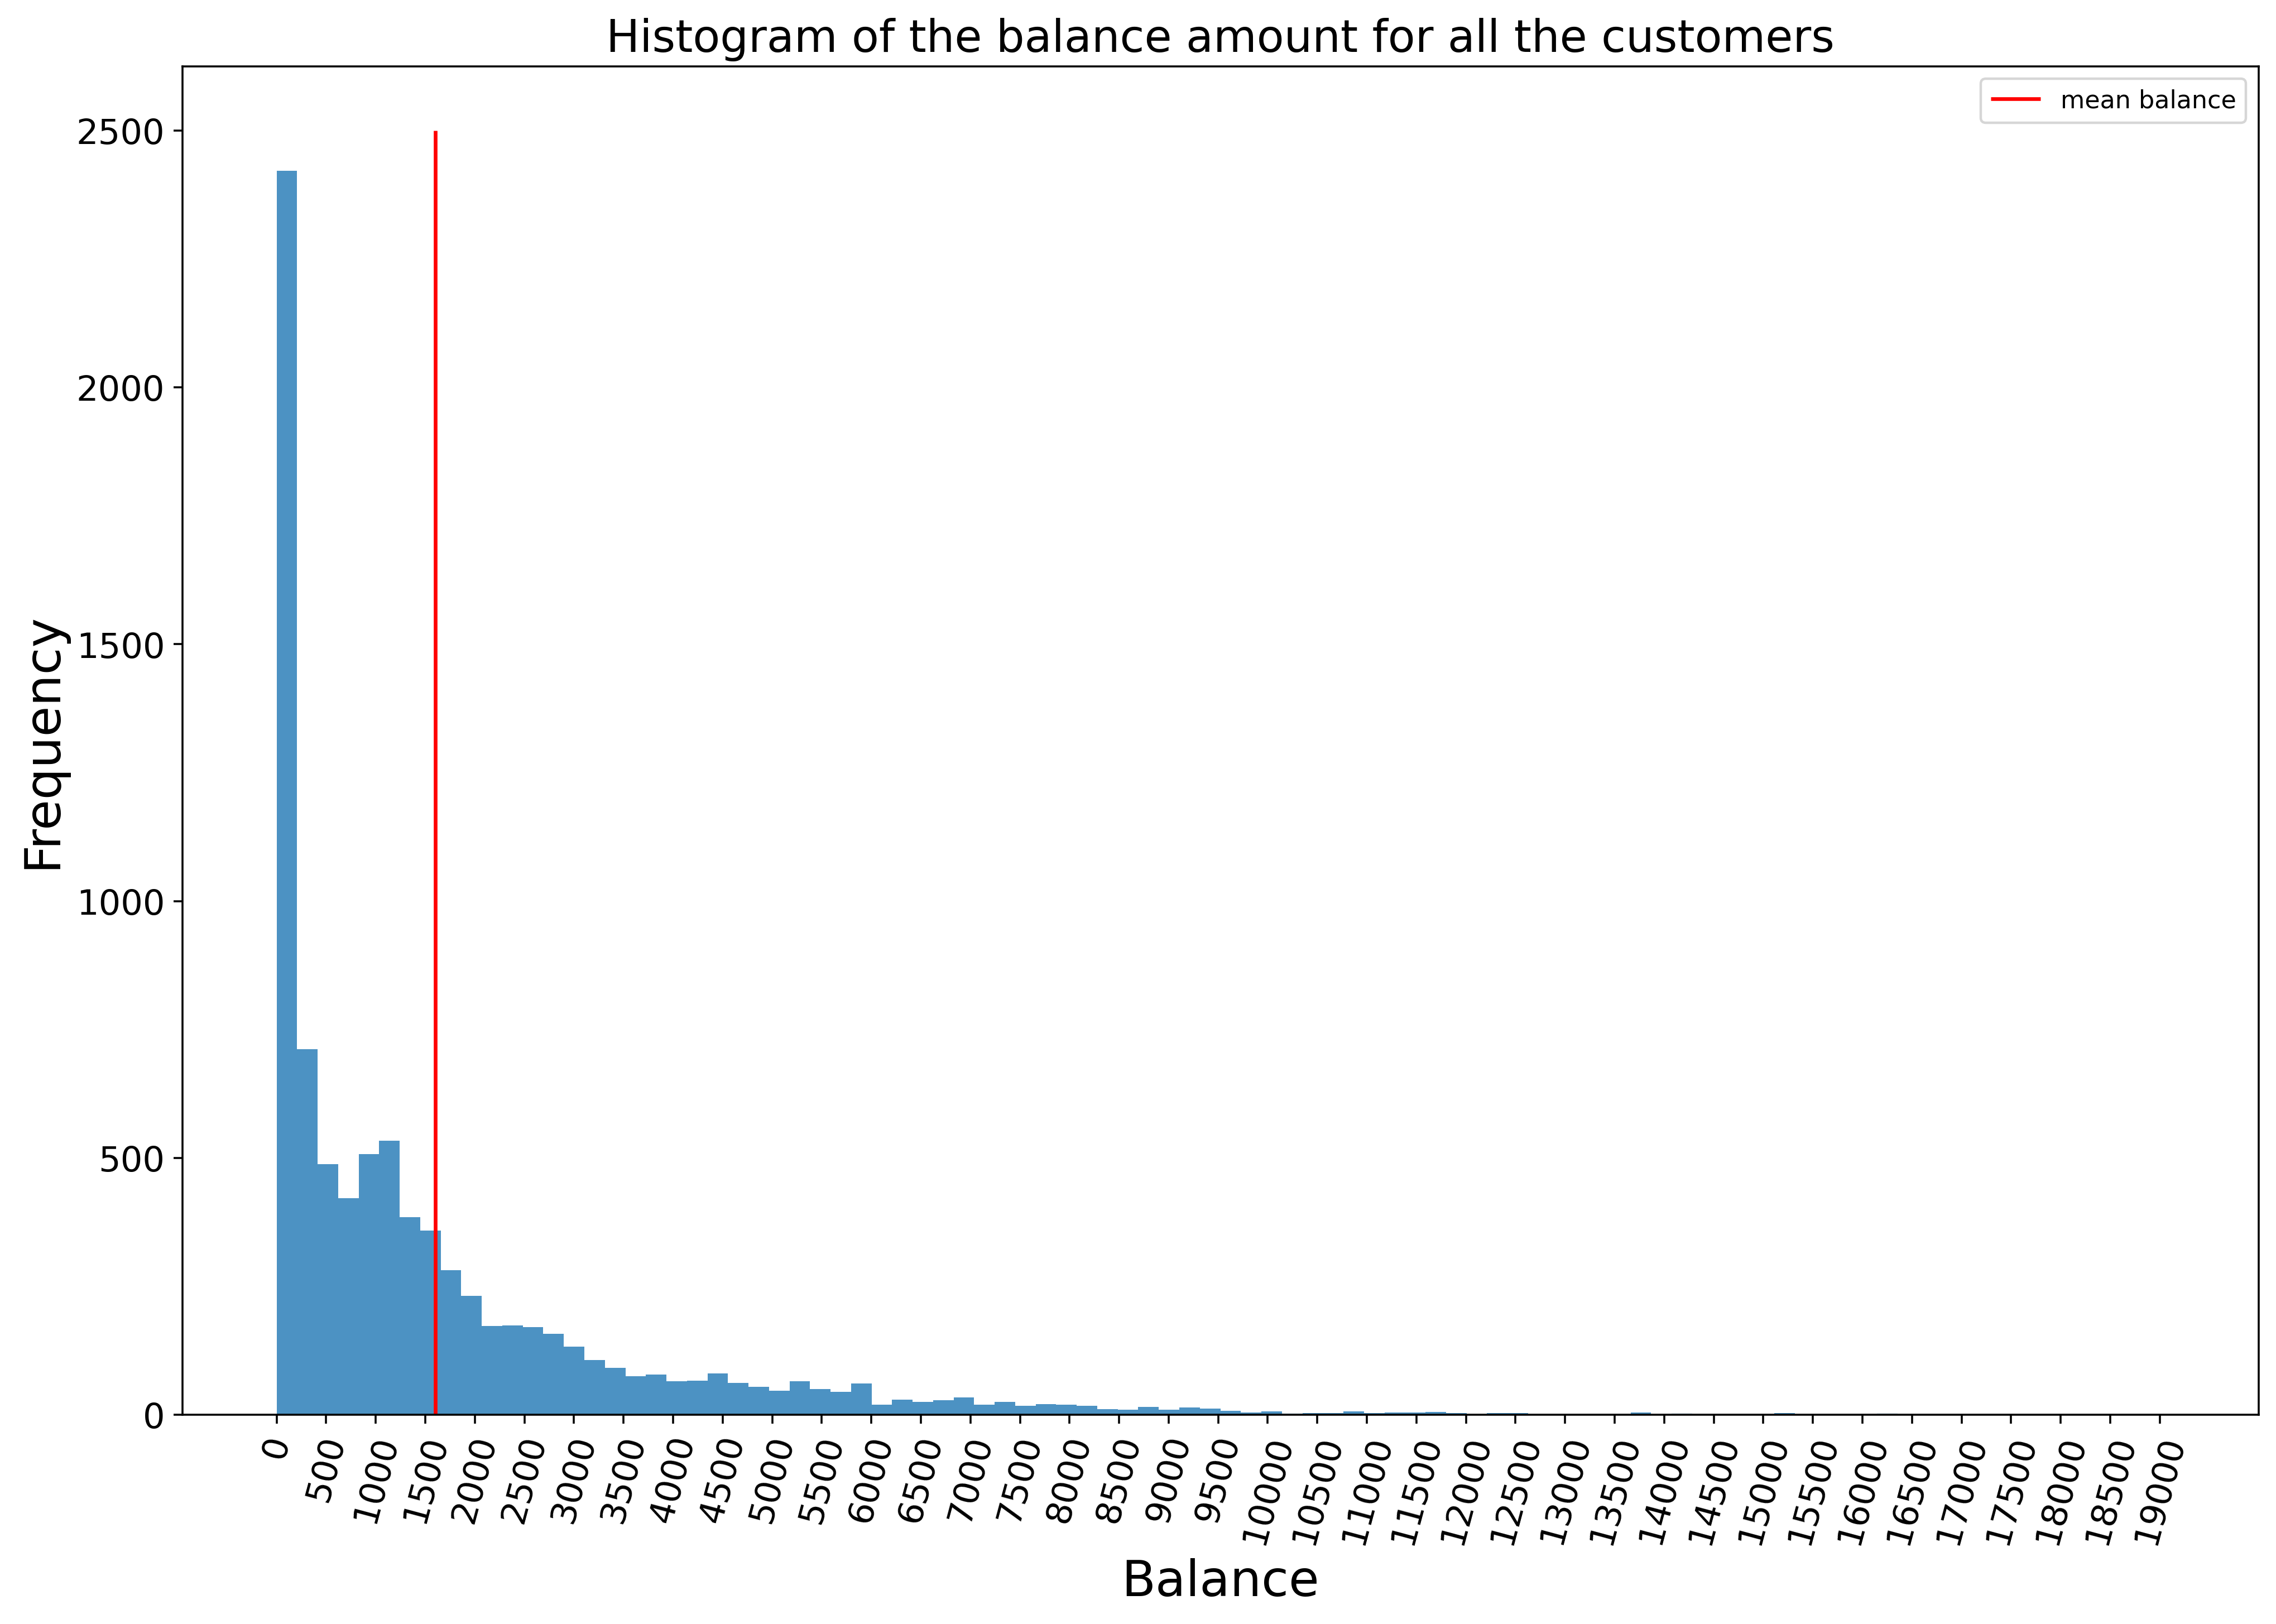

In [87]:
fig_1_1 = plt.figure(figsize=(15,10), dpi=320)

plt.title('Histogram of the balance amount for all the customers', fontsize=18)
plt.xlabel('Balance', fontsize=20)
plt.ylabel('Frequency',fontsize=20)

plt.xticks(np.arange(0, max(balance), 500),fontsize=14,rotation=75)
plt.yticks(fontsize=14)

plt.vlines(np.mean(balance), ymin=0, ymax=2500,  colors='red', linestyles='solid', label='mean balance')
plt.hist(balance, int(intervals),alpha=0.8)

plt.legend()
plt.show()

1.2 Report any structure you find and any hypotheses you have about that structure

As we can see in the balance histogram, between 2019 and 2020 that the maximum frequency in the balance is between 0 and 1000, it seems to have a logarithmic normal distribution or minimum Weibull distribution. Maybe the most of the balance is small because at the beginning of the year the contingency began and many people had to increment their online purchases.

1.3 Report mean and median balance, grouped by year and month of *activated_date*.

In [88]:
mean_balance_mensual = data.groupby(data.index.month)[['balance']].mean() # Group mean balance by month
median_balance_mensual = data.groupby(data.index.month)[['balance']].median() # Group median balance by month
mean_balance_annual = data.groupby(data.index.year)[['balance']].mean() # Group mean balance by year
median_balance_annual = data.groupby(data.index.year)[['balance']].median() # Group median balance by year

In [89]:
mean_balance_mensual # Show mean balance group by month

,balance
activated_date,
1,1864.259536
2,1784.641287
3,1590.094278
4,1540.150147
5,1249.460309
6,971.212562
7,664.835110
10,2548.794248
11,1890.539524


In [90]:
median_balance_mensual # Show median balance group by month

,balance
activated_date,
1,1180.961924
2,1018.880453
3,894.357857
4,969.583332
5,779.431874
6,518.894713
7,251.144969
10,1545.598011
11,1107.961644


In [91]:
mean_balance_annual # Show mean balance group by year

,balance
activated_date,
2019,2143.497354
2020,1378.526977


In [92]:
 median_balance_annual # Show median balance group by year

,balance
activated_date,
2019,1245.890862
2020,777.678006


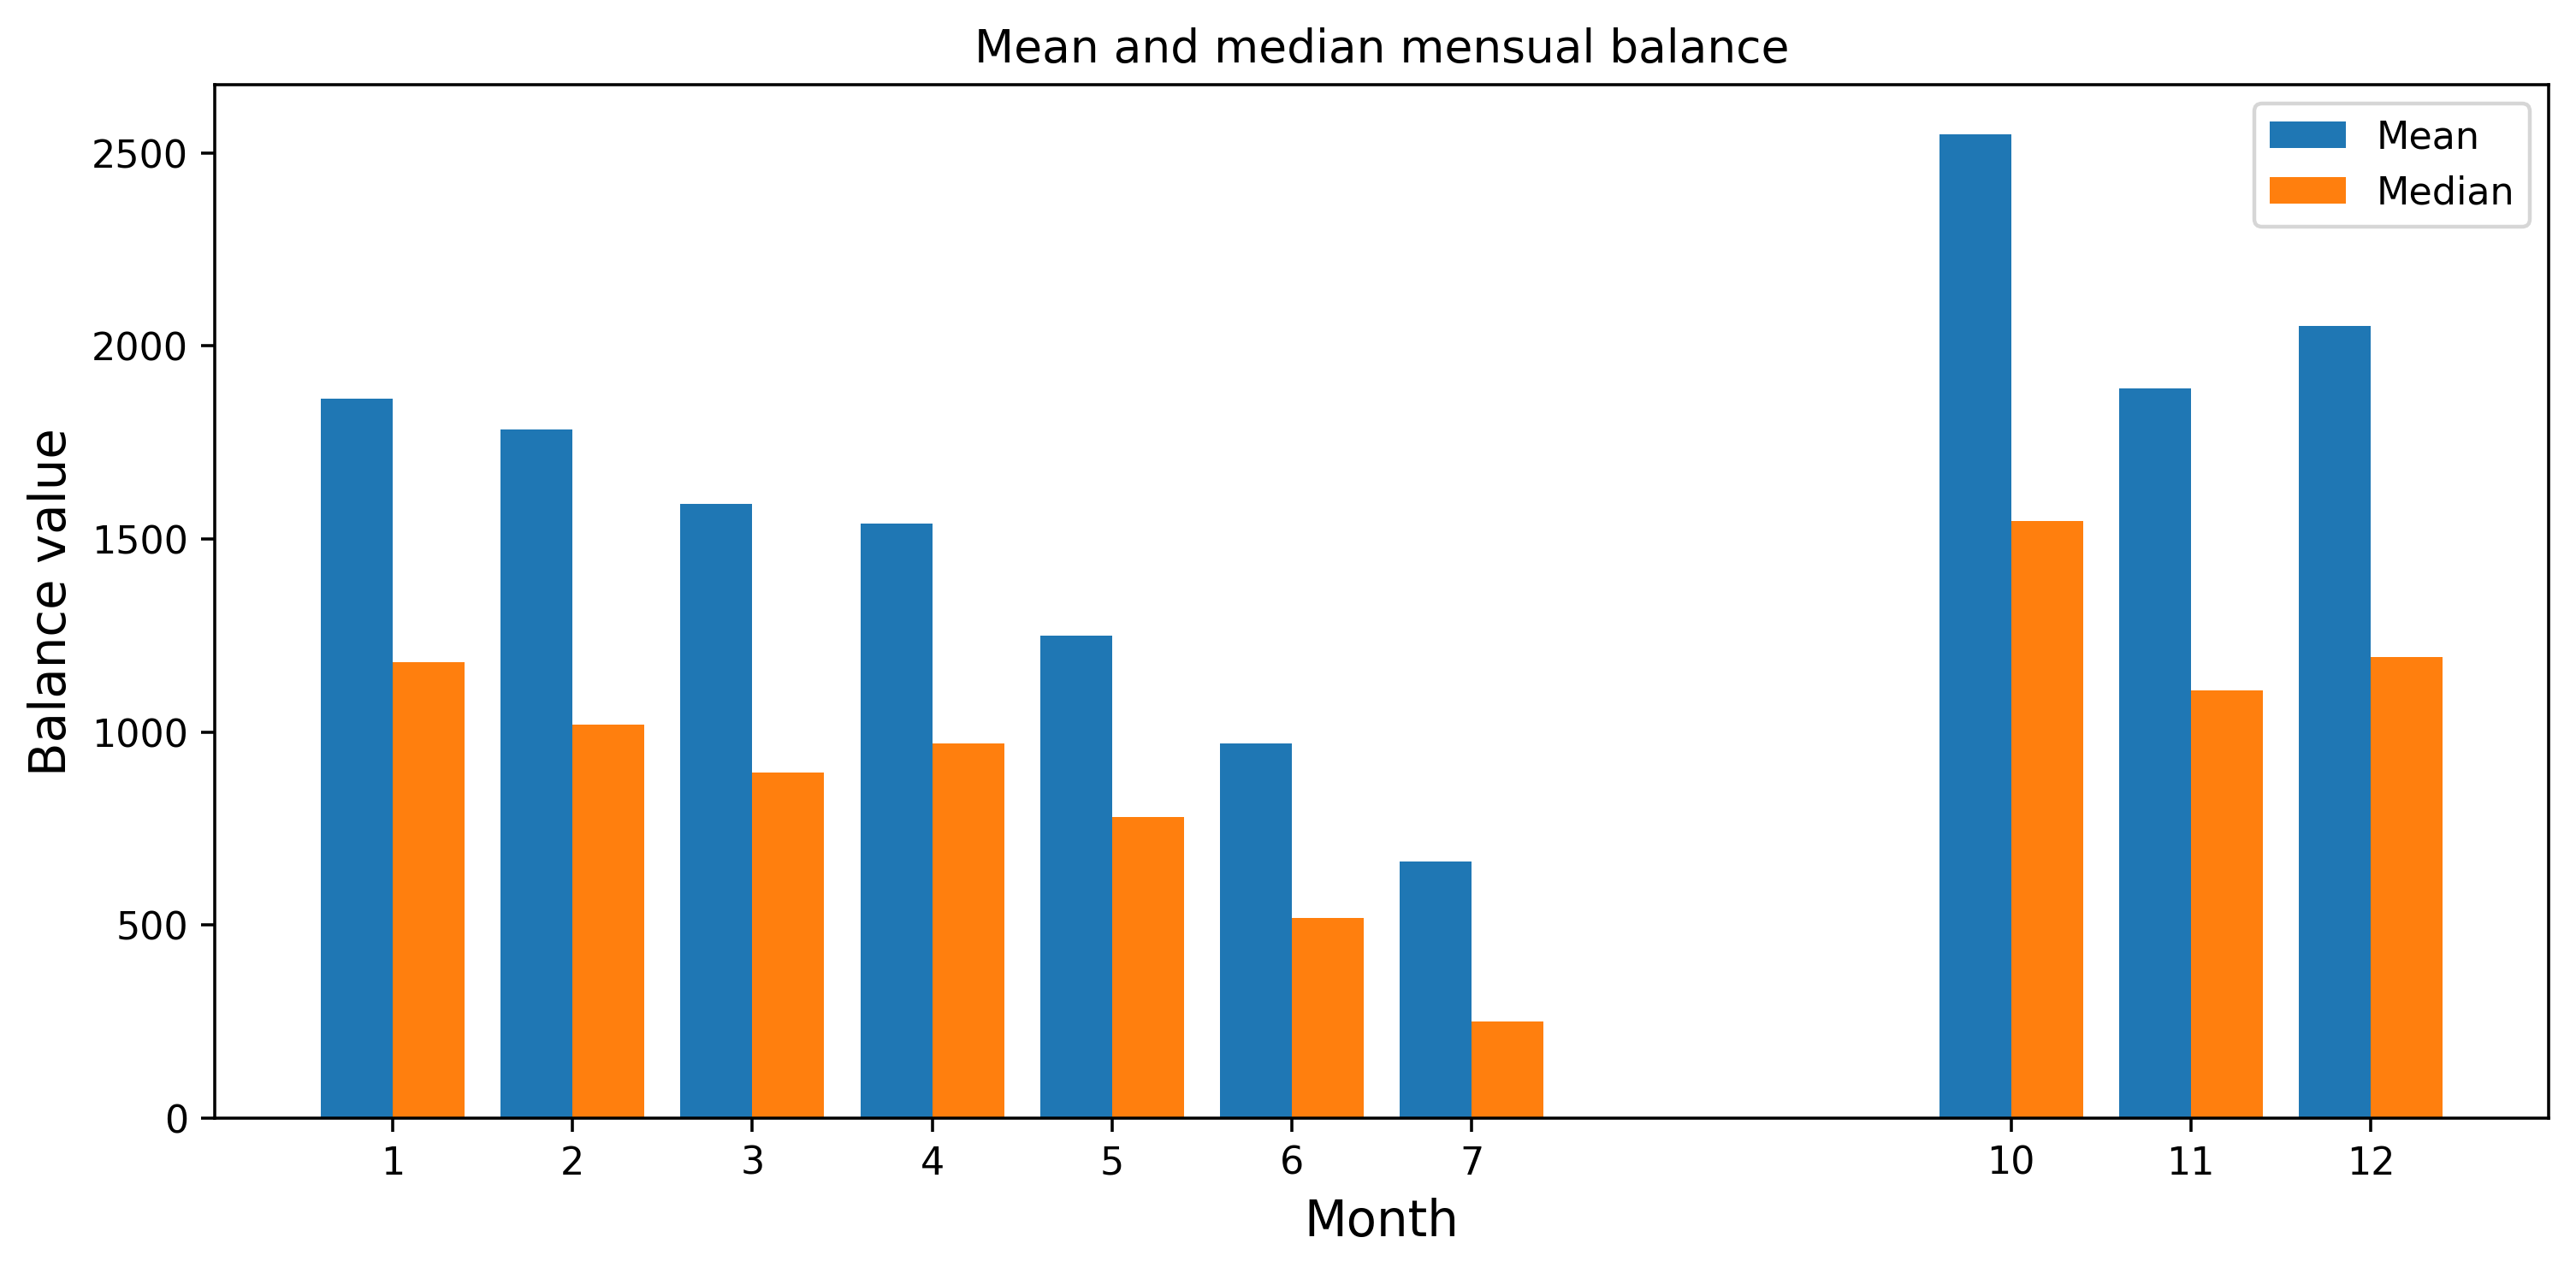

In [93]:
fig1_1 = plt.figure(figsize=(11,5),dpi=320) # Figure size and dpi size
  
plt.bar(mean_balance_mensual.index - 0.2, mean_balance_mensual.balance, 0.4, label = 'Mean') # Plot bar of mean mensual balance
plt.bar(mean_balance_mensual.index + 0.2, median_balance_mensual.balance, 0.4, label = 'Median') # Plot bar of median mensual balance
  
plt.xticks(mean_balance_mensual.index,mean_balance_mensual.index) # Set ticks two plots using names's indexes
plt.title("Mean and median mensual balance") # Title of plot
plt.xlabel("Month", fontsize=13) # Label of x axis
plt.ylabel("Balance value", fontsize=13) # Label of y axis
plt.legend() # Plot all legends information
plt.show()  # Show all above information linked to this figure

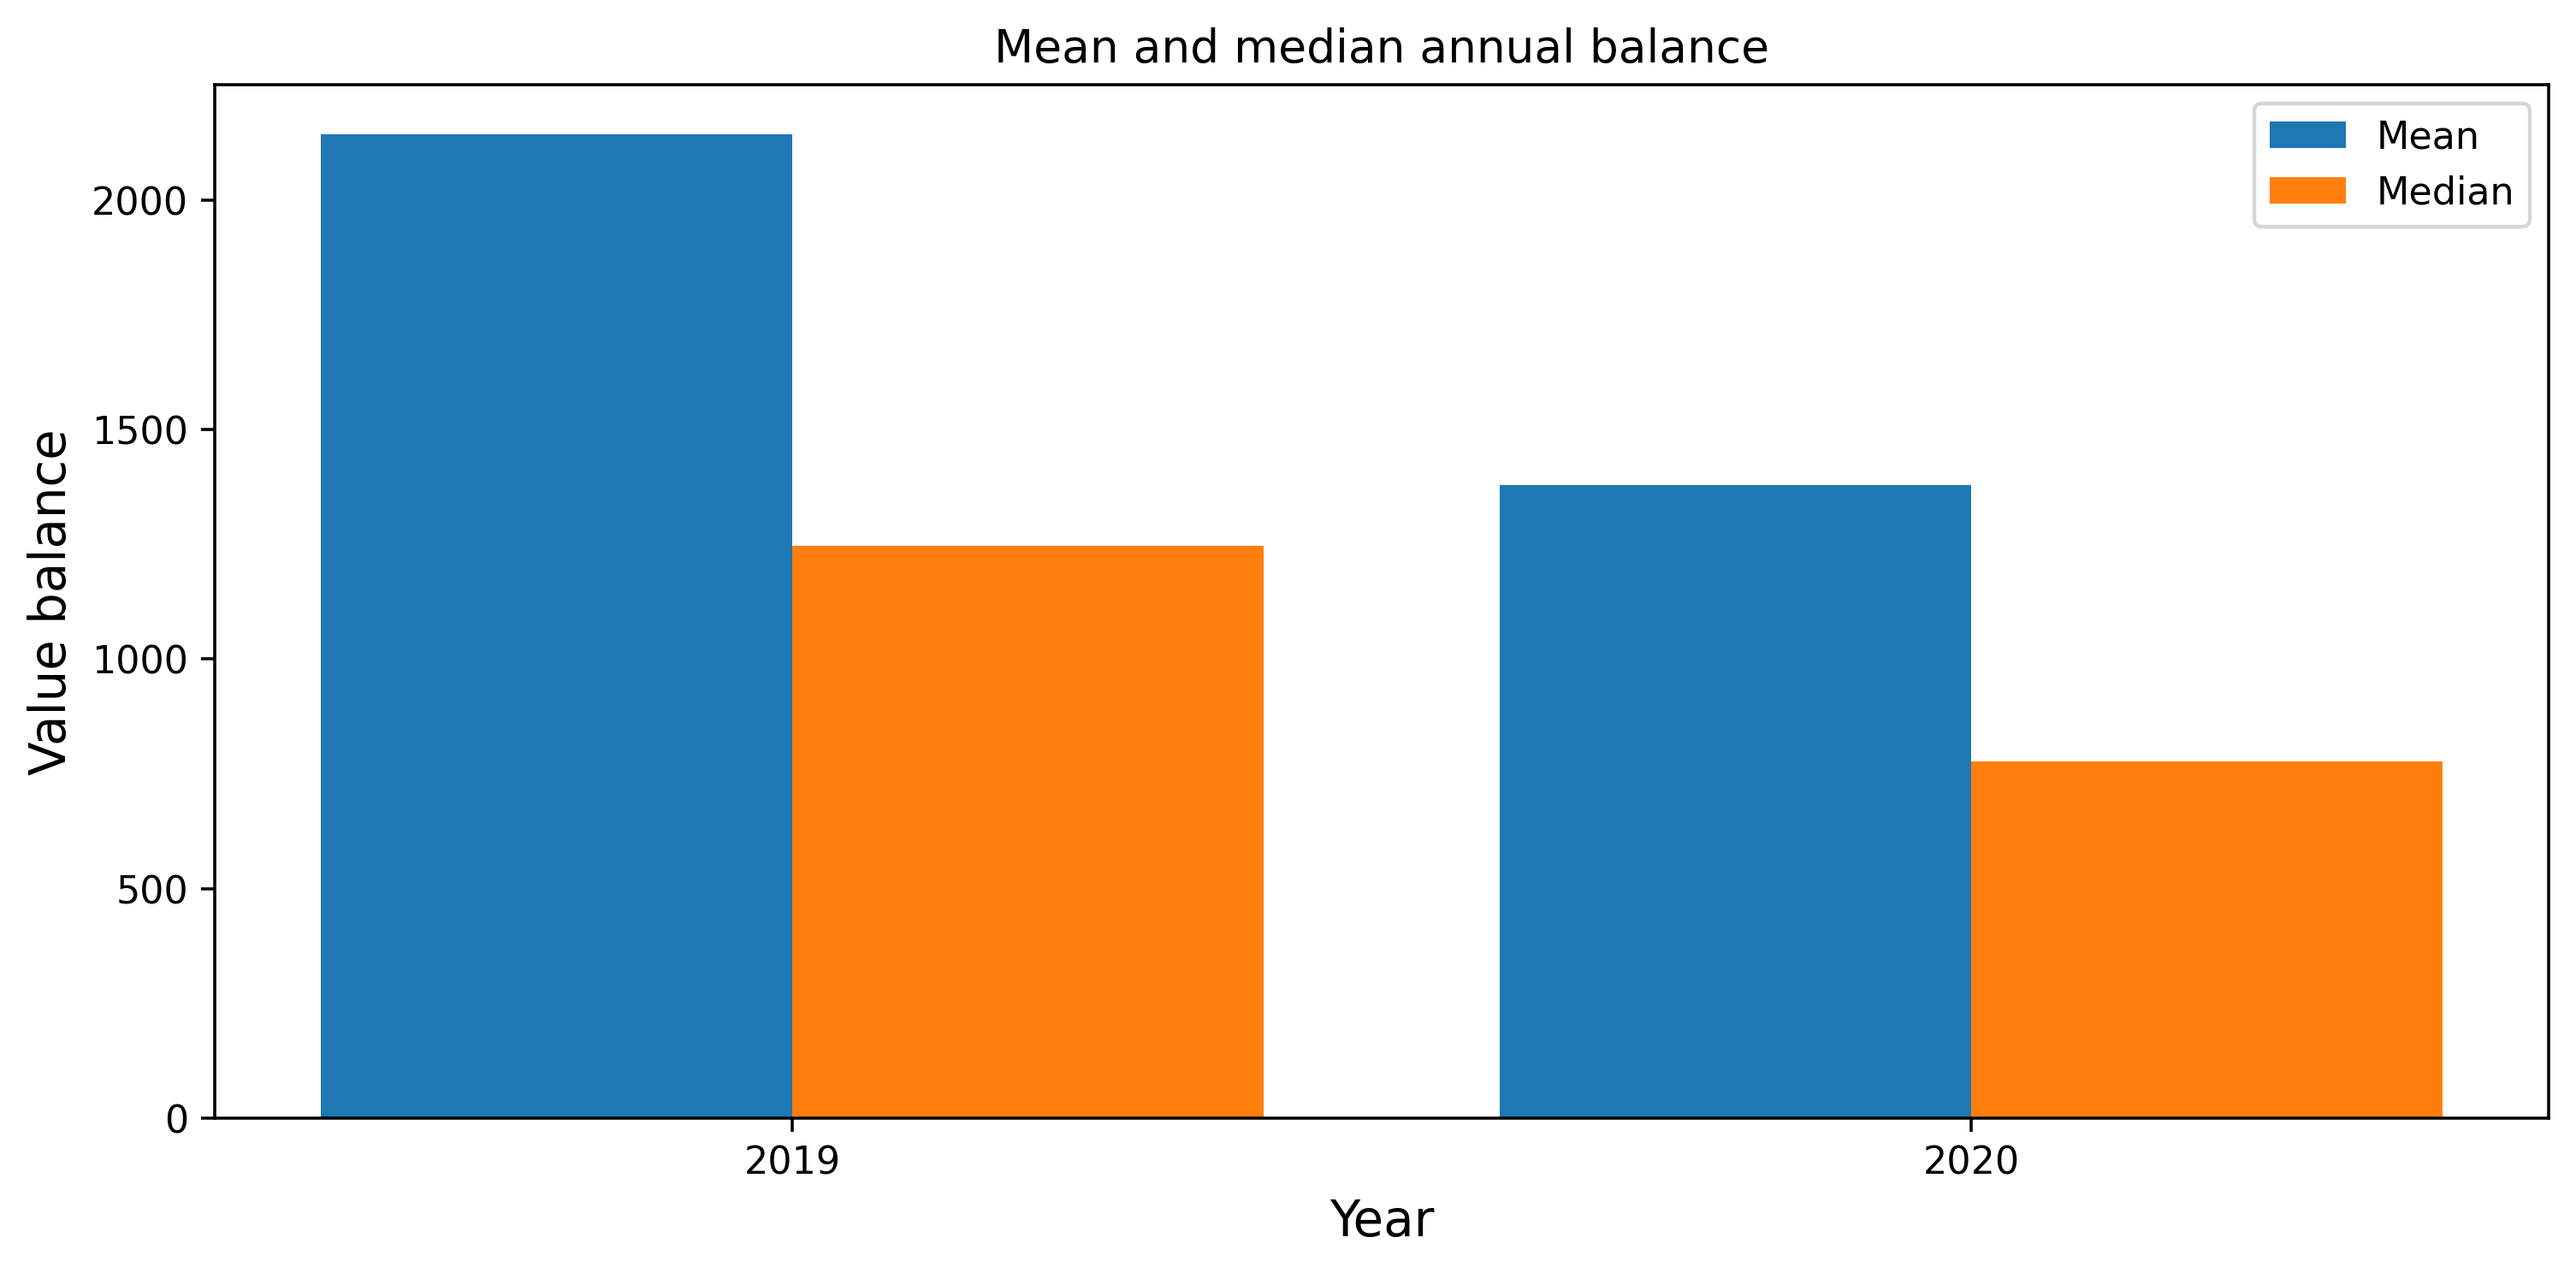

In [94]:
fig1_2 = plt.figure(figsize=(11,5),dpi=320) # Figure size and dpi size
  
plt.bar(mean_balance_annual.index - 0.2, mean_balance_annual.balance, 0.4, label = 'Mean') # Plot bar of mean annual balance
plt.bar(mean_balance_annual.index + 0.2, median_balance_annual.balance, 0.4, label = 'Median') # Plot bar of median annual balance

plt.xticks(mean_balance_annual.index,mean_balance_annual.index) # Set icks two plots using names's indexes 
plt.title("Mean and median annual balance") # Title of plot
plt.xlabel("Year", fontsize=13) # Label of x axis
plt.ylabel("Value balance", fontsize=13) # Label of y axis
plt.legend() # Plot all legends information
plt.show()  # Show all above information linked to this figure

## Question 2

2.1 Report in a table the following information for customers who activated their account and made thir last payment during 2020: *cust_id* (excluding letters), *activated_date* (in format YYYY-MM), *last_payment_date* (in format YYYY-MM-DD) *cash_advance*, *credit_limit*, and calculate field of *cash_advanced* as a percentage of *credit_limit*

In [95]:
data_2020 = data[(data['activated_date'] >= '2020-01-01') & (data['last_payment_date'] <= '2020-12-31')].copy() # Select data with date in 2020

In [96]:
data_2020 = data_2020.iloc[:, [0,1,2,8,15]] # Locate the columns cust_id, activated_date, last_payment_date, cash_advance, credit_limit


In [97]:
data_2020['activated_date'] = data_2020["activated_date"].dt.date.apply(lambda x: x.strftime('%Y-%m')) # Set format for activated_date 
data_2020['last_payment_date'] = data_2020["last_payment_date"].dt.date.apply(lambda x: x.strftime('%Y-%m-%d')) # Set format for activated_date 
data_2020['cash_advance'] = data_2020['cash_advance'] * 100 / data_2020['credit_limit'] # Calculate field of cash_advanced as a percentage of credit_limit

In [98]:
variable = data_2020.cust_id.str.split(r'C([0-9]*)', expand=True) # Take only numbers in cust_id
data_2020['cust_id'] = variable[1] # Set column cust_id
data_2020 = data_2020.set_index(data_2020['cust_id']) # Set cust_id for convenience
data_2020.drop('cust_id', inplace=True, axis=1) # Delete cust_id in data frame because already exists as index

In [99]:
for column in data_2020.columns: # Print index columns
    print(column,data_2020.columns.get_loc(column) )#

activated_date 0
last_payment_date 1
cash_advance 2
credit_limit 3


We can use tabulate library to tabulate the data frame as table as it's asked in the question 2.

In [100]:
print(tabulate(data_2020, tablefmt="pipe", floatfmt=(None, None, None, '.3f', '.3f'), headers="keys",numalign='', stralign='center', disable_numparse=True ))

|  cust_id  |  activated_date  |  last_payment_date  |    cash_advance     |    credit_limit    |
|:---------:|:----------------:|:-------------------:|:-------------------:|:------------------:|
|   12709   |     2020-01      |     2020-05-08      | 30.391150950000004  |       8000.0       |
|   12710   |     2020-01      |     2020-05-26      |         0.0         |       2000.0       |
|   12712   |     2020-01      |     2020-10-20      |         0.0         |       3000.0       |
|   12713   |     2020-01      |     2020-08-22      |         0.0         |       9000.0       |
|   12714   |     2020-01      |     2020-04-26      |  5.250873066666665  |       1500.0       |
|   12715   |     2020-01      |     2020-10-16      |         0.0         |       4000.0       |
|   12716   |     2020-01      |     2020-05-06      | 25.119285444444444  |       9000.0       |
|   12717   |     2020-01      |     2020-08-13      | 17.484975942857144  |       3500.0       |
|   12718   |     20

## Quiestion 3

3.1 Build a predective model for fraud
 
3.1 - For this question we can use all the variables that it have values between 1 and 0: balance_frequency, purchases_frequency, oneoff_purchases_frequency and  purchases_installments_frequency. We can also see the correlation between all the variables using with de heat map or correlation map (double cllick to zoom in).
 
purchases, installments_purchases, cash_advance, cash_advance_frequency, cash_advance_trx, purchases_trx, payments exceed by 0.5 correlation coefficient.


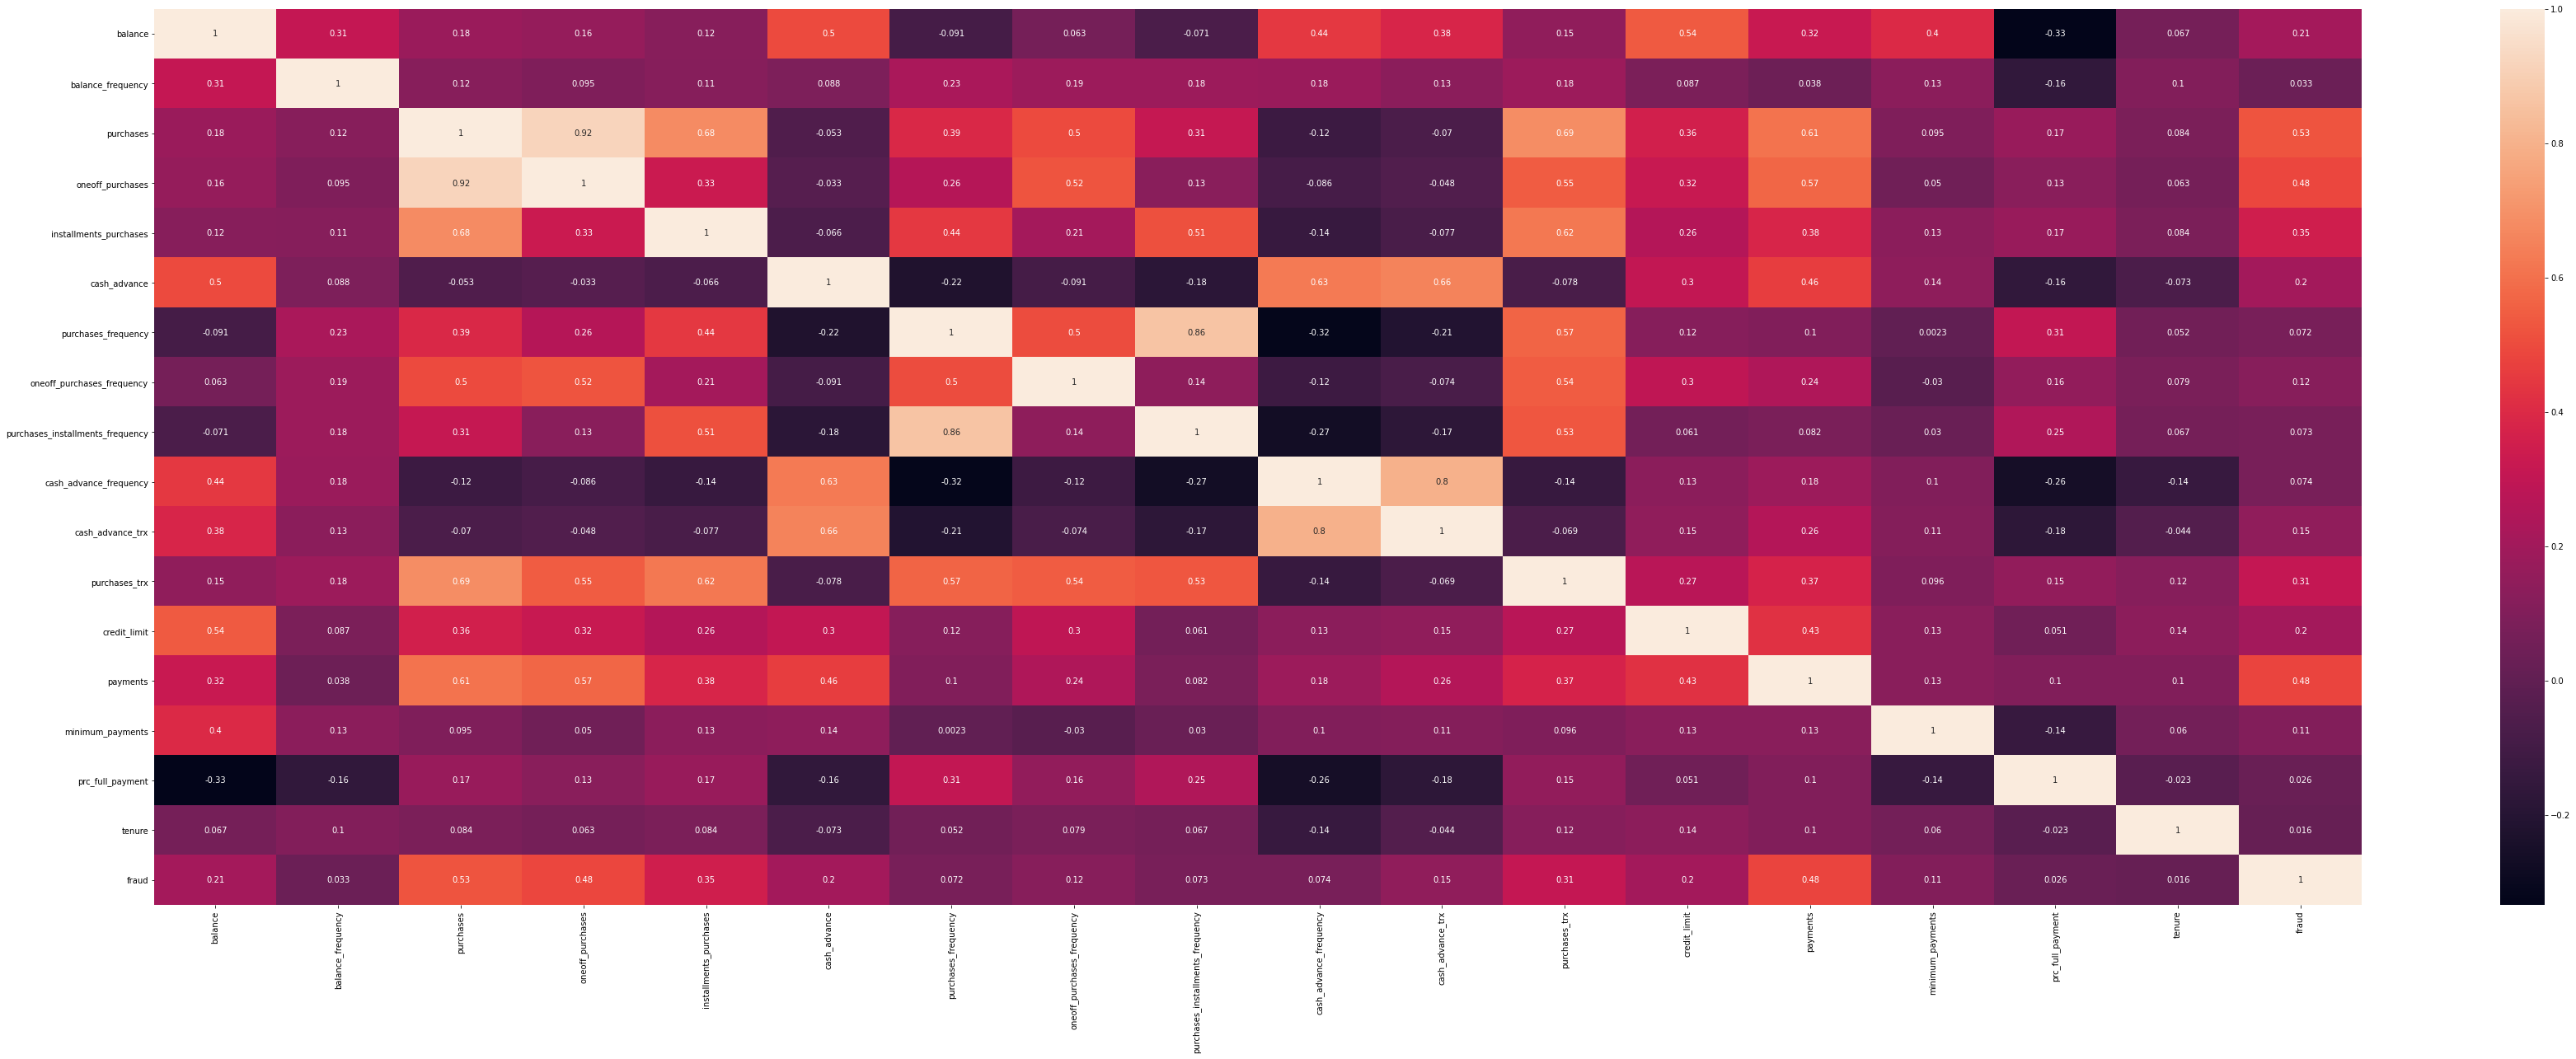

In [101]:
plt.figure(figsize = (60,20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [102]:
# Set the mark binary (1= it's fraud, 0 = not's fraud)

fraud = data.loc[data['fraud'] == 1]
no_fraud = data.loc[data['fraud'] == 0]

In [103]:
data.corr()['fraud'].sort_values() # Coefficients of correlation with fraud column

tenure                              0.015860
prc_full_payment                    0.025667
balance_frequency                   0.032574
purchases_frequency                 0.072426
purchases_installments_frequency    0.072581
cash_advance_frequency              0.073698
minimum_payments                    0.108695
oneoff_purchases_frequency          0.121973
cash_advance_trx                    0.146824
cash_advance                        0.204299
credit_limit                        0.204585
balance                             0.208532
purchases_trx                       0.307915
installments_purchases              0.351493
payments                            0.478951
oneoff_purchases                    0.484372
purchases                           0.525284
fraud                               1.000000
Name: fraud, dtype: float64

In [104]:
len(fraud), len(no_fraud) # Show how many frauds they are in the column fraud with the mark binary (1= it's fraud, 0 = not's fraud)

(68, 8429)

In [105]:
data.columns # Show the columns of the data to choise preictors 

Index(['cust_id', 'activated_date', 'last_payment_date', 'balance',
       'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In [106]:
# Define predictors and target

target = 'fraud'
predictors = ['balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']

## Train, test and split model

##  Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets.

In [107]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2018, shuffle=True )

### RandomForrestClassifier model.

Define model parameters

Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC). Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.


In [108]:
classifier = RandomForestClassifier(n_jobs=4,random_state=2018, criterion='gini', n_estimators=100,verbose=False)

Let's train the RandonForestClassifier using the train_df data and fit function.

In [109]:
classifier.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

Let's now predict the target values for the valid_df data, using predict function.



In [110]:
prediction = classifier.predict(valid_df[predictors])

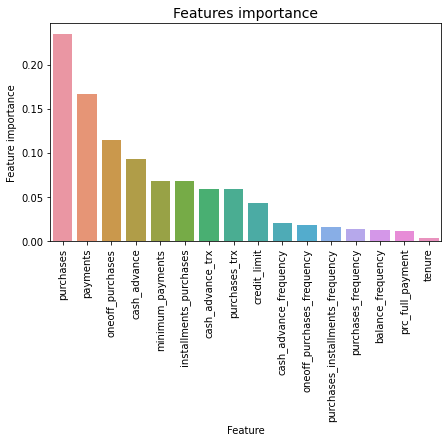

In [111]:
temporal = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier.feature_importances_})
temporal = temporal.sort_values(by='Feature importance',ascending=False)
fig3_2 = plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=temporal)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

3.2 What explanatory variable was the most powerful predictor for fraud?

As figure3_2 the results indicate that 'purchases' is the most powerful variable to predict a fraud.
